In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from matplotlib.animation import FuncAnimation

import librosa

import spleeter
from spleeter.separator import Separator
from spleeter.audio.adapter import AudioAdapter

In [5]:
song_file = "./Midnights (3am Edition)/04 Snow On The Beach.mp3"

song, sr = librosa.load(song_file, sr=None)

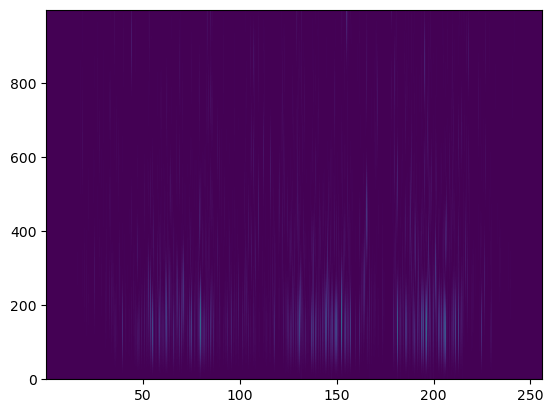

In [6]:
signal = song
f, t, Sxx = spectrogram(signal, fs=sr, nfft=int(sr/2))

plt.pcolormesh(t, f[:500], Sxx[:500,:])

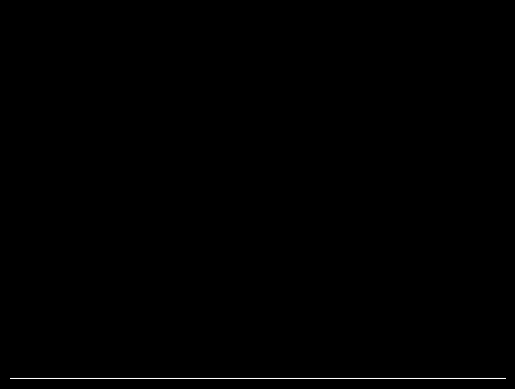

In [9]:
fig = plt.figure(facecolor='k')
ax = fig.add_subplot(111)
fps = 60

p_comp = []
pc, = ax.plot(f[:500], Sxx[:500, 0], 'w')
p_comp.append(pc)

plt.xlim([0, f[:500].max()])
plt.ylim([Sxx[:500, :].min(), Sxx[:500, :].max()])
plt.axis('off')

def animate(i):
    int_i = int(i)
    p_comp[0].set_data(f[:500], Sxx[:500, int_i])
    return p_comp

idx = np.linspace(0, len(t), int(len(signal) * fps / sr), endpoint=False)
ani = FuncAnimation(fig=fig, func=animate, frames=idx, interval=1000/fps)

save_folder = './song_files/'
song_name = 'Snow On The Beach'
ani.save(save_folder+song_name+'_animation.mp4')